In [316]:
import sys
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)
import urllib3 as url

In [315]:
sys.path.insert(0, '/home/skaf48/.local/lib/python3.4/site-packages')

In [241]:
def theurl(name):
    answer={"2000":"https://www.ssa.gov/oact/babynames/decades/names2000s.html", 
            "1990":"https://www.ssa.gov/oact/babynames/decades/names1990s.html", 
            "1980":"https://www.ssa.gov/oact/babynames/decades/names1980s.html", 
            "1970":"https://www.ssa.gov/oact/babynames/decades/names1970s.html", 
            "1960":"https://www.ssa.gov/oact/babynames/decades/names1960s.html", 
            "1950":"https://www.ssa.gov/oact/babynames/decades/names1950s.html", 
            "1940":"https://www.ssa.gov/oact/babynames/decades/names1940s.html", 
            "1930":"https://www.ssa.gov/oact/babynames/decades/names1930s.html", 
            "1920":"https://www.ssa.gov/oact/babynames/decades/names1920s.html", 
            "1910":"https://www.ssa.gov/oact/babynames/decades/names1910s.html", 
            "1900":"https://www.ssa.gov/oact/babynames/decades/names1900s.html", 
            "1890":"https://www.ssa.gov/oact/babynames/decades/names1890s.html", 
            "1880":"https://www.ssa.gov/oact/babynames/decades/names1880s.html",
            "century":"https://www.ssa.gov/oact/babynames/decades/century.html",
            "14":"https://www.ssa.gov/cgi-bin/popularnames.cgi"
            }
    return answer[name]

In [97]:
theurl("2000")

'https://www.ssa.gov/oact/babynames/decades/names2000s.html'

In [131]:
def make_soup(url):
    response=requests.get(url)
    soup=BeautifulSoup(response.content,"lxml")
    return soup

In [132]:
this=make_soup(theurl("2000"))

In [99]:
this.title

<title>Top names of the 2000s</title>

In [35]:
this.findAll('td',limit=60)

[<td>
 <p><a href="../index.html">Popular Baby names</a></p>
 <p></p><p></p><form name="tops"><label for="decade">Select another decade?</label>
 <br/><select id="decade" name="decade">
 <option title="select decade" value="index.html">Decade</option>
 <option title="2000s" value="names2000s.html">2000s</option>
 <option title="1990s" value="names1990s.html">1990s</option>
 <option title="1980s" value="names1980s.html">1980s</option>
 <option title="1970s" value="names1970s.html">1970s</option>
 <option title="1960s" value="names1960s.html">1960s</option>
 <option title="1950s" value="names1950s.html">1950s</option>
 <option title="1940s" value="names1940s.html">1940s</option>
 <option title="1930s" value="names1930s.html">1930s</option>
 <option title="1920s" value="names1920s.html">1920s</option>
 <option title="1910s" value="names1910s.html">1910s</option>
 <option title="1900s" value="names1900s.html">1900s</option>
 <option title="1890s" value="names1890s.html">1890s</option>
 <op

In [284]:
def popular_names(year):
    this=make_soup(theurl(year))
    
    # find all tables then specifiy which table
    tables = this.findChildren('table')
    table = tables[1]
    
    # extract the data
    data   = [[td.text for td in row.select('td')]
             for row in table.findAll('tr')]
    data=data[2:len(data)-1]
    
    # create the headers
    headers = ['Rank', 'Boy_name', 'Number_of_boys', 'Girl_name', 'Number_of_girls']
    
    # find the body of the data and zip it together
    #final=[]
    #final.append(headers)
    #final.append(data)
    cols   =  zip(*data)
    
    tbl_d  = {name:col for name, col in zip(headers,cols)}
    #print(tbl_d)
    # create a dataframe from the html and trim the first column off
    df = pd.DataFrame(tbl_d)
    return df

In [362]:
names_2000=popular_names("2000")
names_1990=popular_names("1990")
names_1980=popular_names("1980")
names_1970=popular_names("1970")
names_1960=popular_names("1960")
names_1950=popular_names("1950")
names_1940=popular_names("1940")
names_1930=popular_names("1930")
names_1920=popular_names("1920")
names_1910=popular_names("1910")
names_1900=popular_names("1900")
names_1890=popular_names("1890")
names_1880=popular_names("1880")
names_2000[1:4]

,Boy_name,Girl_name,Number_of_boys,Number_of_girls,Rank
2,Joshua,Emma,"231,771","181,156",3


EXtracting babay names for each year 2000 to 2014

In [303]:
def scrape_local(param):
    #http = urllib3.PoolManager()
    #link = "/home/skaf48/webpages/2014.html"
    #r = http.request('GET', link)
    #page = url.urlopen(link)
    #url = r"/home/skaf48/webpages/2014.html"
    #page = urllib3.urlopen(url)
    soup = BeautifulSoup(open(param),"lxml")
    #soup = BeautifulSoup(response.read())
    return soup

In [304]:
this=scrape_local("/home/skaf48/web pages/2014.html")

In [299]:
this

<!-- saved from url=(0044)https://www.ssa.gov/cgi-bin/popularnames.cgi --><html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Popular Baby Names</title>
<meta content="eng" name="dc.language" scheme="ISO639-2"/>
<meta content="OACT" name="dc.creator"/>
<meta content="sckunkel" name="lead_content_manager"/>
<meta content="jlkunkel" name="coder"/>
<meta content="2015-02-12" name="dc.date.reviewed" scheme="ISO8601"/>
<!-- Input: year=2014, top=100, number=n -->
</head>
<body bgcolor="#ffffff" leftmargin="0" text="#000000" topmargin="1">
<table border="0" cellpadding="1" cellspacing="0" width="100%">
<tbody>
<tr valign="middle">
<td align="left" width="25%">
<a href="http://www.ssa.gov/"><img border="0" src="./2014_files/ssalogo.png"/></a></td>
<th><h1>Popular Names in 2014</h1></th>
</tr>
<tr bgcolor="#333366"><td colspan="2" height="1"></td></tr>
</tbody></table>
<script src="./2014_files/chkinput.js" type="text/javascript"></script>
<table border="0" c

In [388]:
def each_year(param):
    this=scrape_local("/home/skaf48/web pages/"+str(param)+".html")
    tables = this.findChildren('table')
    table = tables[1]
    
    # extract the data
    data   = [[td.text for td in row.select('td')]
             for row in table.findAll('tr')]
    data=data[2:len(data)-1]
    
    # create the headers
    headers = ['Rank', 'Male_name', 'Number_of_total_males', 'Female_name', 'Number_of_total_females']
    
    # find the body of the data and zip it together
    #final=[]
    #final.append(headers)
    #final.append(data)
    cols   =  zip(*data)
    
    tbl_d  = {name:col for name, col in zip(headers,cols)}
    tbl_d['Year']=param
    #print(tbl_d)
    # create a dataframe from the html and trim the first column off
    df = pd.DataFrame(tbl_d)
    return df

In [716]:
fourteen = each_year(2014)
thirteen = each_year(2013)
twelve = each_year(2012)
eleven = each_year(2011)
ten = each_year(2010)
nine = each_year(2009)
eight = each_year(2008)
seven = each_year(2007)
six = each_year(2006)
five = each_year(2005)
four = each_year(2004)
three = each_year(2003)
two = each_year(2002)
one = each_year(2001)
millenium = each_year(2000)
ninety_nine = each_year(1999)
ninety_eight = each_year(1998)
ninety_seven = each_year(1997)
ninety_six = each_year(1996)
ninety_five = each_year(1995)
ninety_four = each_year(1994)
ninety_three = each_year(1993)
ninety_two = each_year(1992)
ninety_one = each_year(1991)
ninety = each_year(1990)

ninety_nine

,Female_name,Male_name,Number_of_total_females,Number_of_total_males,Rank,Year
0,Emily,Jacob,"26,537","35,344",1,1999
1,Hannah,Michael,"21,667","33,905",2,1999
2,Alexis,Matthew,"19,232","30,414",3,1999
3,Sarah,Joshua,"19,084","27,251",4,1999
4,Samantha,Nicholas,"19,033","25,635",5,1999
5,Ashley,Christopher,"18,131","25,601",6,1999
6,Madison,Andrew,"18,051","23,847",7,1999
7,Taylor,Joseph,"16,905","23,203",8,1999
8,Jessica,Daniel,"16,345","22,671",9,1999
9,Elizabeth,Tyler,"15,331","22,663",10,1999


In [726]:
df=[fourteen,thirteen,twelve,eleven,ten,nine,eight,seven,six,five,four,three,two,one,millenium,ninety_nine,ninety_eight,ninety_seven,ninety_six,ninety_five] #ninety_four,ninety_three,ninety_two,ninety_one,ninety
final_eachyear_names = pd.concat(df)
final_eachyear_names.tail()

,Female_name,Male_name,Number_of_total_females,Number_of_total_males,Rank,Year
995,Tiarra,Laurence,189,125,996,1995
996,Astrid,Mateo,188,125,997,1995
997,Danyelle,Hudson,188,124,998,1995
998,Lourdes,Dejuan,188,123,999,1995
999,Mari,Desean,188,123,1000,1995


Get the total births in US for each year from http://wonder.cdc.gov/controller/datarequest/D66;jsessionid=A3F342614F04051CC02ADAFD2F274EA6

In [707]:
d = {'Year' : pd.Series([2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995],
                        index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']), 
     'male_births' : pd.Series([2040701,2012954,2021434,2024052,2046935,2113856,2173389,2208071,2184237,
                                2118982,2104661,2093535,2057979,2057922,2076969,2026854,2016205,1985596,1990480,1996355],
                               index=['1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']), 
     'female_births':pd.Series([1947375,1919227,1931407,1929538,1952451,2016809,2074305,2108162,2081318,
                                2019367,2007391,1996415,1963747,1968011,1981845,1932563,1925348,1895298,1901014,1903234],
                               index=['1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']), 
     'total_births':pd.Series([3988076,3932181,3952841,3953590,3999386,4130665,4247694,4316233,4265555,
                               4138349,4112052,4089950,4021726,4025933,4058814,3959417,3941553,3880894,3891494,3899589],
                              index=['1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
    }

In [708]:
birth_totals = pd.DataFrame(d)
birth_totals

,Year,female_births,male_births,total_births
1,2014,1947375,2040701,3988076
2,2013,1919227,2012954,3932181
3,2012,1931407,2021434,3952841
4,2011,1929538,2024052,3953590
5,2010,1952451,2046935,3999386
6,2009,2016809,2113856,4130665
7,2008,2074305,2173389,4247694
8,2007,2108162,2208071,4316233
9,2006,2081318,2184237,4265555
10,2005,2019367,2118982,4138349


In [425]:
def ret_total_male_births(year):
    return birth_totals['male_births'][birth_totals['Year']==year]   

In [427]:
def ret_total_female_births(year):
    return birth_totals['female_births'][birth_totals['Year']==year]

In [431]:
ret_total_female_births(2014)

'/home/skaf48'

In [739]:
movie_df = pd.read_csv('babynames/data/movie_data_final.csv', encoding='latin-1')
bb_names_df = pd.read_csv('babynames/data/NationalNames.csv')

In [740]:
year_list = np.sort(movie_df.Year.unique()).astype(np.int)
year_list

array([1937, 1939, 1940, 1942, 1945, 1946, 1950, 1952, 1953, 1955, 1956,
       1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1967, 1969, 1970,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1982, 1983,
       1984, 1985, 1989, 1990, 1992, 1993, 1994, 1996, 1997, 1999, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2009, 2010, 2012, 2013, 2015])

## What's the influence of cast or characters's names in popular movies on baby's name after the movie has been released?

In [718]:
def plot_names_by_year(year):
    lower_limit = year - 10 if year - 10 >= 1937 else year 
# based on character name
    character_list = movie_df[movie_df['Year'] == year].Character_Name.unique()
    bb_names_character = bb_names_df[(bb_names_df['Name'].isin(character_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] 
    bb_names_character.pivot(index='Year', columns='Name', values='Count').plot().axvline(year, color='r')
# based on cast name
#     cast_list = movie_df[movie_df['Year'] == year].Cast_Name.unique()
#     bb_names_cast = bb_names_df[(bb_names_df['Name'].isin(cast_list))&(bb_names_df['Gender']==('M'or'F'))] 
#     bb_names_cast.pivot(index='Year', columns='Name', values='Count').plot()

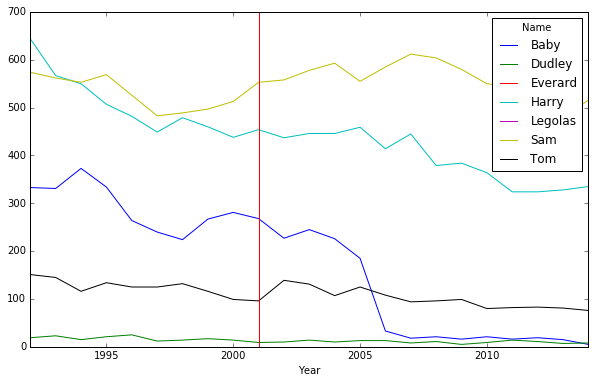

In [719]:
plot_names_by_year(2001)

In [747]:
def plot_names_by_movie(title):
    year = movie_df[movie_df['Title']==title].Year.unique()[0]
    lower_limit = year - 5 if year - 5 >= 1937 else year 
# based on character name
    character_list = movie_df[movie_df['Title']=='Titanic'].Character_Name.unique()
    bb_names_character = bb_names_df[(bb_names_df['Name'].isin(character_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] #[['Name','Year','Gender','Count']]
    d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
   ....:      'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
    popularity={'name': }
    for i in range(year-5,year+5):
        names_tobe_analyzed = final_eachyear_names[(final_eachyear_names['Male_name'].isin(character_list)) &((final_eachyear_names['Year']>(year-5)))] #[['Name','Year','Gender','Count']]
        for name in names_tobe_analyzed:
            #if(final_eachyear_names['Male_name']==name & final_eachyear_names['Year']==i):
            popularity[name]=popularity_malename(name)
    bb_names_character.pivot(index='Year', columns='Name', values='Count').plot(title=title+', '+str(year),fontsize=20).axvline(year, color='r')

    # based on cast name
#     cast_list = movie_df[movie_df['Title']==title].Cast_Name.unique()
#     bb_names_cast = bb_names_df[(bb_names_df['Name'].isin(cast_list))&(bb_names_df['Gender']==('M'or'F'))&((bb_names_df['Year']>lower_limit))] #[['Name','Year','Gender','Count']]
#     bb_names_cast.pivot(index='Year', columns='Name', values='Count').plot()

In [748]:
plot_names_by_movie('Titanic')

#final_eachyear_names['Male_name']=='Noah'
#final_eachyear_names['Year']==2014
# year=1997
# character_list = movie_df[movie_df['Title']=='Titanic'].Character_Name.unique()
# names_tobe_analyzed = final_eachyear_names[(final_eachyear_names['Male_name'].isin(character_list)) &((final_eachyear_names['Year']>(year-5)))] #[['Name','Year','Gender','Count']]
# print(names_tobe_analyzed)

[]
[]


TypeError: list indices must be integers, not str

calculate the popularity of each name for an year using total birth names for a name over total number of births

In [732]:
#names_tobe_analyzed = final_eachyear_names[(final_eachyear_names['Male_name'].isin(character_list)) &((final_eachyear_names['Year']>(year-5)))]
#names_tobe_analyzed
from fastnumbers import fast_real

def popularity_malename(name):
    num = final_eachyear_names['Number_of_total_males'][final_eachyear_names['Male_name']==name]
    num=np.array(num)
    a=np.empty([len(num)],dtype=int)
    for i in range(0,len(num)):
        a[i]=num[i].replace(",",'')
    print(a)
    years = final_eachyear_names['Year'][final_eachyear_names['Male_name']==name]
    years=np.array(years)
    print(years)
    pop=np.empty([len(num)])
    for i in range(1,len(num)):
        pop[i]=a[i]/ret_total_male_births(years[i])
        print(pop[i],a[i]/ret_total_male_births(years[i]),pop[i],years[i])
    return pop

def popularity_femalename(year,name):
    return final_eachyear_names['Number_of_total_females'][final_eachyear_names['Female_name']==name]/ret_total_female_births(year)

In [733]:
tmp=popularity_malename('Forrest')
# num = final_eachyear_names['Number_of_total_males'][final_eachyear_names['Male_name']=='Jack']
# num=np.array(num)
# a=np.empty([len(num)],dtype=int)
# for i in range(0,len(num)):
#     a[i]=num[i].replace(",",'')
# type(a)

[332 254 195 194 207 252 262 296 370 431 858]
[2014 2013 2003 2002 2001 2000 1999 1998 1997 1996 1995]
0.000126182714558 2    0.000126
Name: male_births, dtype: float64 0.000126182714558 2013
9.31438929848e-05 12    0.000093
Name: male_births, dtype: float64 9.31438929848e-05 2003
9.42672398504e-05 13    0.000094
Name: male_births, dtype: float64 9.42672398504e-05 2002
0.000100586902711 14    0.000101
Name: male_births, dtype: float64 0.000100586902711 2001
0.000121330650578 15    0.000121
Name: male_births, dtype: float64 0.000121330650578 2000
0.00012926436734 16    0.000129
Name: male_births, dtype: float64 0.00012926436734 1999
0.000146810468182 17    0.000147
Name: male_births, dtype: float64 0.000146810468182 1998
0.000186342035339 18    0.000186
Name: male_births, dtype: float64 0.000186342035339 1997
0.000216530686066 19    0.000217
Name: male_births, dtype: float64 0.000216530686066 1996
0.000429783280028 20    0.00043
Name: male_births, dtype: float64 0.000429783280028 1995


In [609]:
num = final_eachyear_names['Number_of_total_males'][final_eachyear_names['Male_name']=='Jack']
#num=np.array(num)
#type(num)

#import pandas as pd
#temp = final_eachyear_names['Number_of_total_males'][final_eachyear_names['Male_name']=='Jack']
#temp=pd.DataFrame(temp)
#temp.describe()
#temp = np.array(temp)
#print(temp[1])
#temp['Number_of_total_males']
#final_eachyear_names['Year'][final_eachyear_names['Male_name']=='Jack']
#print(final_eachyear_names['Number_of_total_males'][final_eachyear_names['Male_name']=='Jack'],final_eachyear_names['Year'][final_eachyear_names['Male_name']=='Jack'],ret_total_male_births(2000))
#print(ret_total_male_births(2000))

KeyError: 1

In [338]:
from imdb import IMDb
import csv
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

start_time = time.time()

with open('/baynames/data/raw_100_films_inflation_adj.csv') as data_in, open('/babynames/data/movie_data.csv', 'w') as data_out:
    writer = csv.writer(data_out, delimiter=',')
    writer.writerows([['Rank', 'Title', 'Year', 'Cast', 'Character']])
    i = 0
    j = 1
    im = IMDb()
    for row in data_in:
        if i%2 == 0: 
            temp_row = row.split(' (')
            temp_row2 = temp_row[1].split(')')
            title = temp_row[0]
            year = temp_row2[0]

            movie = im.search_movie(title)[0]
            im.update(movie)
            up_limit = len(movie['cast']) if len(movie['cast']) < 10 else 10
            
            for k in range(0, up_limit):
                cast_name = movie['cast'][k]  
                character_name = movie['cast'][k].currentRole  
                data = [j, title, year, cast_name, character_name]
                writer.writerows([data])
            j += 1
        i += 1
        
print('done')

ImportError: No module named 'imdb'